In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [110]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

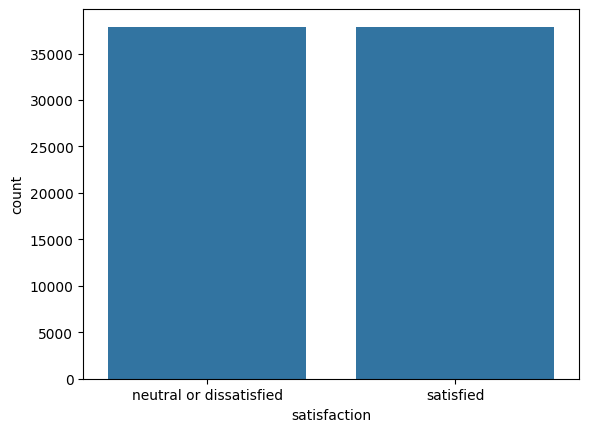

In [111]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [112]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,55,1440,0
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,32,326,0
75777,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,49,2435,0
75778,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,41,192,0


In [113]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
75778    neutral or dissatisfied
75779    neutral or dissatisfied
Name: satisfaction, Length: 75780, dtype: object

In [114]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53046, 77) and test set is :(22734, 77)


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17498508, -0.40683307, -0.4912002 , ...,  0.01821996,
        -0.01552641, -0.53038921],
       [-0.17498508, -0.40683307,  2.03582977, ..., -0.89825185,
         0.72638421,  3.31278522],
       [-0.17498508,  2.45801058, -0.4912002 , ..., -0.89825185,
         0.06336253, -0.53038921],
       ...,
       [-0.17498508,  2.45801058, -0.4912002 , ..., -1.1273698 ,
        -0.47024582, -0.53038921],
       [-0.17498508,  2.45801058, -0.4912002 , ..., -1.35648775,
         0.81590986, -0.53038921],
       [-0.17498508, -0.40683307, -0.4912002 , ..., -0.5163886 ,
        -0.64841073, -0.53038921]])

## Set paramiter CV

In [116]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## K-NN(K Nearest Neighbours)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.043136 วินาที


In [118]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 97.15 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.98      0.97     11333
              satisfied       0.98      0.97      0.97     11401

               accuracy                           0.97     22734
              macro avg       0.97      0.97      0.97     22734
           weighted avg       0.97      0.97      0.97     22734



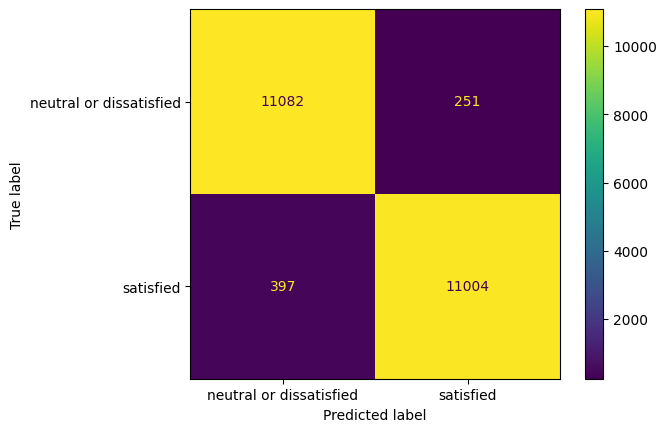

In [119]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [120]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.96720385 0.97540288 0.96946565 0.97257563 0.9689002  0.97398926
 0.97539593 0.9736991  0.96662896 0.97256787 0.97313348 0.97256787
 0.97341629 0.96691176 0.96493213]
Mean CV Accuracy: 0.9711
Standard Deviation CV Accuracy: 0.0033
เวลาที่ใช้ในการทำ Cross Validation: 4.394021 วินาที


In [121]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9796403121818799
Test Accuracy: 0.9714964370546318


## Save Model Predic

In [122]:
import pickle
pickle_out = open("../../pipelines/model_KNN_business.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_KNN.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [123]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
9323,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,47,460,30,neutral or dissatisfied
30206,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,25,3933,7,satisfied
57649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,27,2561,20,neutral or dissatisfied
43493,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,54,354,0,neutral or dissatisfied
65108,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,35,1504,1,neutral or dissatisfied
52957,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,44,373,0,satisfied
44535,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,40,2502,0,satisfied
67033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,27,2677,0,neutral or dissatisfied
51865,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,46,457,0,satisfied
13809,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,56,175,0,neutral or dissatisfied


In [124]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
9323,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,47,460,30
30206,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,25,3933,7
57649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,27,2561,20
43493,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,54,354,0
65108,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,35,1504,1
52957,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,44,373,0
44535,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,40,2502,0
67033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,27,2677,0
51865,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,46,457,0
13809,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,1,56,175,0


In [125]:
y_sam = df_sam.iloc[:,-1]
y_sam


9323     neutral or dissatisfied
30206                  satisfied
57649    neutral or dissatisfied
43493    neutral or dissatisfied
65108    neutral or dissatisfied
52957                  satisfied
44535                  satisfied
67033    neutral or dissatisfied
51865                  satisfied
13809    neutral or dissatisfied
5115                   satisfied
43019                  satisfied
47669                  satisfied
51638                  satisfied
17731                  satisfied
59959    neutral or dissatisfied
46745                  satisfied
64789    neutral or dissatisfied
18691    neutral or dissatisfied
39202                  satisfied
Name: satisfaction, dtype: object

In [126]:
model = pickle.load(open("../../pipelines/model_KNN_business.pkl", 'rb'))
scaler_1 = pickle.load(open("../../pipelines/scaler_KNN.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied']
Accuracy of Knn is : 100.0 % .
